In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [44]:
def plot(image, title):
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Tắt trục
    plt.title(title)  # Thêm tiêu đề
    plt.show()

In [13]:
# Lấy đường viền các kí tự số
def contourExtraction(image):
    # Chuyển ảnh sang không gian màu HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Định nghĩa khoảng màu xanh dương trong không gian HSV
    lower_blue = np.array([100, 25, 25])
    upper_blue = np.array([140, 255, 255])

    # Tạo mặt nạ cho màu xanh dương
    blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

    # Tìm các contours của từng vùng màu xanh dương
    contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Lọc các contour có kích thước nhỏ
    min_width = 10
    min_height = 25
    max_height = 150
    filtered_contours = [c for c in contours if cv2.boundingRect(c)[2] > min_width and min_height < cv2.boundingRect(c)[3] < max_height]

    # Sắp xếp các contour theo diện tích (lấy các vùng lớn nhất)
    sorted_contours = sorted(filtered_contours, key=lambda c: cv2.contourArea(c), reverse=True)

    # Giới hạn chỉ lấy 10 contour lớn nhất
    number_contours = sorted_contours[:10]

    # Sắp xếp các contour theo trục x từ trái sang phải (vì đây là dãy số)
    number_contours = sorted(number_contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    return number_contours

In [5]:
dataset_dir = "test"

for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg'):
    # Đường dẫn tới ảnh
        image_path = f"{dataset_dir}/{filename}"
        image = cv2.imread(image_path)
        image_name = os.path.splitext(os.path.basename(image_path))[0]

        # Thư mục để lưu các ảnh đã cắt
        cropped_folder = f"cropped_{dataset_dir}"
        if not os.path.exists(cropped_folder):
            os.makedirs(cropped_folder)

        number_contours = contourExtraction(image)

        # Đảm bảo rằng số contours và số ký tự trong image_name là như nhau
        if len(number_contours) != len(image_name):
            print(f"Warning: File {filename} has {len(number_contours)} contours but {len(image_name)} digits.")
            # for i, contour in enumerate(number_contours):
            #     # Tạo bounding box cho từng vùng contour
            #     x, y, w, h = cv2.boundingRect(contour)
                
            #     # Cắt vùng ảnh tương ứng
            #     cropped_image = image[y:y+h, x:x+w]

            #     # Tạo tên file cho ảnh đã cắt
            #     cropped_image_name = f"errol_{i}_{image_name}.jpg"
                
            #     # Đường dẫn đầy đủ để lưu ảnh
            #     save_path = os.path.join(cropped_folder, cropped_image_name)
                
            #     # Lưu ảnh đã cắt
            #     cv2.imwrite(save_path, cropped_image)
            #     print(f"Đã lưu ảnh đã cắt tại: {save_path}")
            continue
        # Lặp qua từng contour và cắt từng vùng ảnh
        for i, contour in enumerate(number_contours):
            # Tạo bounding box cho từng vùng contour
            x, y, w, h = cv2.boundingRect(contour)
            
            # Cắt vùng ảnh tương ứng
            cropped_image = image[y:y+h, x:x+w]

            # Tạo tên file cho ảnh đã cắt
            cropped_image_name = f"{image_name[i]}_{i}_{image_name}.jpg"
            
            # Đường dẫn đầy đủ để lưu ảnh
            save_path = os.path.join(cropped_folder, cropped_image_name)
            
            # Lưu ảnh đã cắt
            cv2.imwrite(save_path, cropped_image)
            print(f"Đã lưu ảnh đã cắt tại: {save_path}")

Đã lưu ảnh đã cắt tại: cropped_test\0_0_0343958302.jpg
Đã lưu ảnh đã cắt tại: cropped_test\3_1_0343958302.jpg
Đã lưu ảnh đã cắt tại: cropped_test\4_2_0343958302.jpg
Đã lưu ảnh đã cắt tại: cropped_test\3_3_0343958302.jpg
Đã lưu ảnh đã cắt tại: cropped_test\9_4_0343958302.jpg
Đã lưu ảnh đã cắt tại: cropped_test\5_5_0343958302.jpg
Đã lưu ảnh đã cắt tại: cropped_test\8_6_0343958302.jpg
Đã lưu ảnh đã cắt tại: cropped_test\3_7_0343958302.jpg
Đã lưu ảnh đã cắt tại: cropped_test\0_8_0343958302.jpg
Đã lưu ảnh đã cắt tại: cropped_test\2_9_0343958302.jpg
Đã lưu ảnh đã cắt tại: cropped_test\0_0_0351127150.jpg
Đã lưu ảnh đã cắt tại: cropped_test\3_1_0351127150.jpg
Đã lưu ảnh đã cắt tại: cropped_test\5_2_0351127150.jpg
Đã lưu ảnh đã cắt tại: cropped_test\1_3_0351127150.jpg
Đã lưu ảnh đã cắt tại: cropped_test\1_4_0351127150.jpg
Đã lưu ảnh đã cắt tại: cropped_test\2_5_0351127150.jpg
Đã lưu ảnh đã cắt tại: cropped_test\7_6_0351127150.jpg
Đã lưu ảnh đã cắt tại: cropped_test\1_7_0351127150.jpg
Đã lưu ảnh

In [37]:
# Lấy đường viền các kí tự số
def contourExtraction_show(image):
    # Chuyển ảnh sang không gian màu HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    plot(hsv_image, "Ảnh sau khi chuyển sang không gian màu HSV")
    
    # Định nghĩa khoảng màu xanh dương trong không gian HSV
    lower_blue = np.array([100, 25, 25])
    upper_blue = np.array([140, 255, 255])

    # Tạo mặt nạ cho màu xanh dương
    blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
    plot(blue_mask, "Mặt nạ màu")

    # Tìm các contours của từng vùng màu xanh dương
    contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Lọc các contour có kích thước nhỏ
    min_width = 10
    min_height = 25
    max_height = 150
    filtered_contours = [c for c in contours if cv2.boundingRect(c)[2] > min_width and min_height < cv2.boundingRect(c)[3] < max_height]
    
    # Tạo ảnh với các contour đã lọc để quan sát
    filtered_image = image.copy()
    for c in filtered_contours:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(filtered_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    plot(filtered_image, "Các contour sau khi lọc theo kích thước")

    # Sắp xếp các contour theo diện tích (lấy các vùng lớn nhất)
    sorted_contours = sorted(filtered_contours, key=lambda c: cv2.contourArea(c), reverse=True)
    
    # Giới hạn chỉ lấy 10 contour lớn nhất
    number_contours = sorted_contours[:10]
    
    # Tạo ảnh với 10 contour lớn nhất để kiểm tra
    top_contours_image = image.copy()
    for c in number_contours:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(top_contours_image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    plot(top_contours_image, "10 contour lớn nhất được chọn")
    
    # Sắp xếp các contour theo trục x từ trái sang phải (vì đây là dãy số)
    number_contours = sorted(number_contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    # Tạo ảnh với các contour đã sắp xếp theo thứ tự từ trái sang phải
    sorted_image = image.copy()
    for c in number_contours:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(sorted_image, (x, y), (x + w, y + h), (0, 0, 255), 2)
    plot(sorted_image, "Các kí tự sau khi áp dụng bộ lọc")

    return number_contours


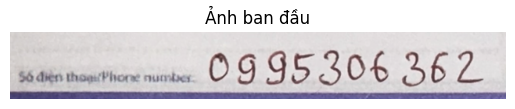

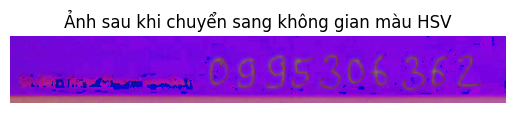

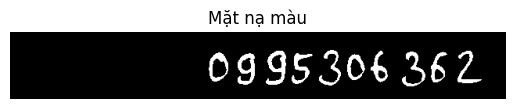

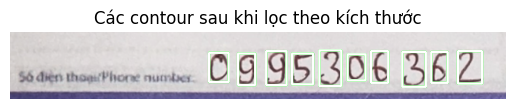

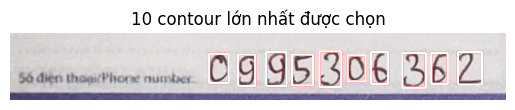

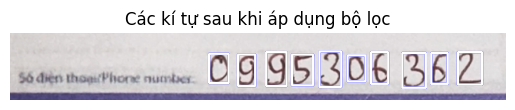

[array([[[266,  27]],
 
        [[265,  28]],
 
        [[263,  28]],
 
        [[261,  30]],
 
        [[260,  30]],
 
        [[260,  31]],
 
        [[256,  35]],
 
        [[256,  37]],
 
        [[255,  38]],
 
        [[255,  45]],
 
        [[254,  46]],
 
        [[254,  49]],
 
        [[255,  50]],
 
        [[255,  56]],
 
        [[256,  57]],
 
        [[256,  59]],
 
        [[258,  61]],
 
        [[258,  62]],
 
        [[259,  62]],
 
        [[260,  63]],
 
        [[264,  63]],
 
        [[265,  62]],
 
        [[267,  62]],
 
        [[269,  60]],
 
        [[270,  60]],
 
        [[271,  59]],
 
        [[272,  59]],
 
        [[272,  58]],
 
        [[277,  53]],
 
        [[277,  51]],
 
        [[278,  50]],
 
        [[278,  40]],
 
        [[277,  39]],
 
        [[277,  38]],
 
        [[276,  37]],
 
        [[276,  36]],
 
        [[275,  35]],
 
        [[275,  34]],
 
        [[274,  33]],
 
        [[274,  32]],
 
        [[272,  30]],
 
        [[272,  

In [91]:
img_path = '0995306362.jpg'
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
plot(img, 'Ảnh ban đầu')
contourExtraction_show(img)

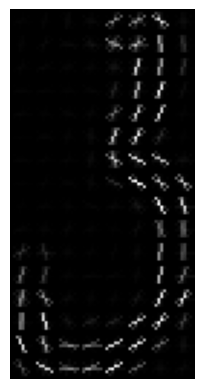

In [106]:
from skimage.feature import hog
import cv2
import matplotlib.pyplot as plt

def visualize_hog(img):
    # Thay đổi kích thước ảnh cho phù hợp với HOG
    resized_img = cv2.resize(img, (64, 128))  # Chọn kích thước chuẩn
    #plot(resized_img, '')
    
    # Chuyển ảnh về xám nếu ảnh đang ở không gian màu BGR
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    #plot(gray_img, '')
    
    # Trích xuất đặc trưng HOG và hình ảnh HOG visualization
    hog_features, hog_image = hog(gray_img,
                                  orientations = 9,
                                  pixels_per_cell=(8, 8),
                                  cells_per_block=(4, 4),
                                  visualize=True,
                                  block_norm='L2-Hys')
    plot(hog_image, '')
img2_path = 'cropped_test/3_1_0367520122.jpg'
img2 = cv2.imread(img2_path)
#plot(img2, '')
visualize_hog(img2)

In [98]:
def extract_sobel_edges(image):
    """Trích xuất đặc trưng cạnh Sobel từ ảnh"""
    # Chuyển đổi ảnh sang Grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plot(gray_image, '')
    # Tính toán Sobel theo hướng x và y
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

    # Tính độ lớn gradient
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    plot(magnitude, '')

    # Chuẩn hóa giá trị về 0-1
    normalized_magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    plot(normalized_magnitude, '')

    # Làm phẳng thành vector 1D
    return normalized_magnitude.flatten()

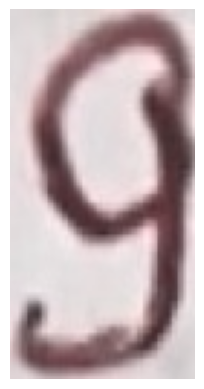

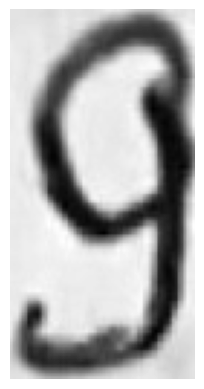

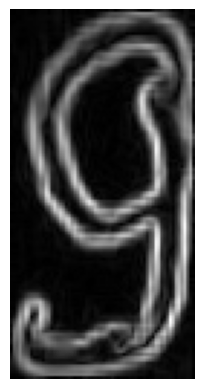

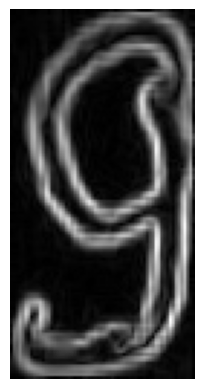

array([ 0.        ,  0.        ,  2.34260643, ..., 11.71303214,
       10.54172893,  0.        ])

In [99]:
img2_path = '9_2_0995306362.jpg'
img2 = cv2.imread(img2_path)
img2 = cv2.resize(img2, (64, 128))
plot(img2, '')
extract_sobel_edges(img2)